# Laborator: Jocul X și 0 cu Inteligență Artificială

În acest laborator, vom crea un joc clasic de **X și 0** (sau "Tic-Tac-Toe") folosind Python și Google Colab. Mai mult decât atât, vom învăța cum să implementăm o strategie de **inteligență artificială (AI)** care va juca împotriva noastră folosind algoritmul **Minimax**.

### Ce veți învăța?
- Cum să desenăm tabla de joc.
- Cum să verificăm mutările și să stabilim câștigătorul.
- Ce este algoritmul **Minimax** și cum ajută AI-ul să ia decizii optime.
- Cum funcționează AI-ul într-un joc simplu și cum ia decizii mai bune decât un jucător uman.



## **Partea 1**- Intrebări teoretice:

✏️ **Problema 1:** Câte configurații de table de joc pot exista într-un joc de **X și 0** pe o tablă **3x3** după ce ambii jucători au făcut **câte o mutare**? (pe tablă se află doar un X și un 0).


✏️ **Problema 2:** Câte configurații de table de joc pot exista într-un joc de **X și 0** pe o tablă **nxn** după ce ambii jucători au făcut **câte două mutări**? (pe tablă se află doar două X-uri și două 0-uri).



✏️ **Problema 3:** Aproximativ câte poziții posibile de table de joc pot exista într-un joc de **X și 0** pe o tablă **nxn**?



✏️ **Problema 4:** Să presupunem că dispunem de o memorie de 16GB (16x1024^3 bytes). O tablă de joc, reprezentată ca o matrice **nxn**, ocupă **nxnx8 bytes**. Câte astfel de matrice de joc putem stoca în memorie? Aproximativ care este cea mai mare dimensiune a tablei pentru care putem salva toate pozițiile posibile (bazat pe raspunsul de la **problema 3**)?



✏️ **Solutia ta aici!**

## **Partea 2** - X și 0 pe o tablă 3 x 3:

In [37]:
#@title Importarea bibliotecilor necesare
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#@title Desenarea tablei de joc

def print_board(board):
    fig, ax = plt.subplots(figsize=(6, 6))  # Creăm o figură de 6x6 pentru tabla de joc.

    # Desenăm grila de joc (liniile orizontale și verticale).
    ax.set_xticks(np.arange(0, 3, 1))
    ax.set_yticks(np.arange(0, 3, 1))
    ax.grid(True, color='black', linewidth=2)  # Setăm liniile grilei să fie negre și groase.

    # Ascundem marcajele și etichetele axelor.
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Setăm fundalul să fie alb.
    ax.set_facecolor('white')

    # Afișăm X-urile și O-urile pe tabla de joc.
    for i in range(3):
        for j in range(3):
            if board[i][j] == "X":
                ax.text(j + 0.5, i + 0.5, "X", ha='center', va='center', fontsize=50, color="red", weight='bold')
            elif board[i][j] == "O":
                ax.text(j + 0.5, i + 0.5, "O", ha='center', va='center', fontsize=50, color="blue", weight='bold')

    # Stabilim limitele grilei.
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    plt.gca().invert_yaxis()  # Inversăm axa y pentru a corespunde cu coordonatele matricei.

    # Afișăm tabla de joc.
    plt.show()


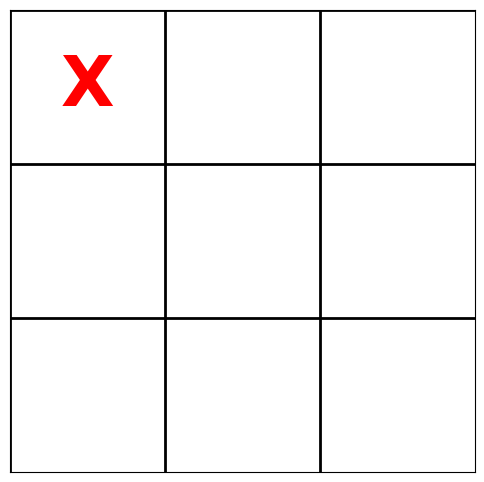

In [39]:
board = [["X", " ", " "],
         [" ", " ", " "],
         [" ", " ", " "]]

print_board(board)

In [40]:
#@title Implementare Reguli

def is_valid_move(board, row, col):
    return board[row][col] == " "

def make_move(board, row, col, player):
    if is_valid_move(board, row, col):
        board[row][col] = player  # Setăm locul respectiv cu simbolul jucătorului.
        return True
    return False

def check_win(board, player):
    # Verificăm liniile
    for row in board:
        if all([cell == player for cell in row]):
            return True

    # Verificăm coloanele
    for col in range(3):
        if all([board[row][col] == player for row in range(3)]):
            return True

    # Verificăm diagonalele
    if all([board[i][i] == player for i in range(3)]) or all([board[i][2 - i] == player for i in range(3)]):
        return True

    return False

def is_draw(board):
    return all([cell != " " for row in board for cell in row])


In [41]:
#@title Implementare Minmax

def minimax(board, depth, is_maximizing):
    if check_win(board, "X"):
        return -1  # Jucătorul X câștigă, deci scor negativ pentru AI.
    if check_win(board, "O"):
        return 1  # AI câștigă, deci scor pozitiv.
    if is_draw(board):
        return 0  # Egalitate.

    if is_maximizing:
        best_score = -float("inf")
        for row in range(3):
            for col in range(3):
                if board[row][col] == " ":
                    board[row][col] = "O"  # AI face mutarea.
                    score = minimax(board, depth + 1, False)
                    board[row][col] = " "
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float("inf")
        for row in range(3):
            for col in range(3):
                if board[row][col] == " ":
                    board[row][col] = "X"  # Jucătorul face mutarea.
                    score = minimax(board, depth + 1, True)
                    board[row][col] = " "
                    best_score = min(score, best_score)
        return best_score

def find_best_move(board):
    best_move = None
    best_score = -float("inf")
    for row in range(3):
        for col in range(3):
            if board[row][col] == " ":
                board[row][col] = "O"
                score = minimax(board, 0, False)
                board[row][col] = " "
                if score > best_score:
                    best_score = score
                    best_move = (row, col)
    return best_move


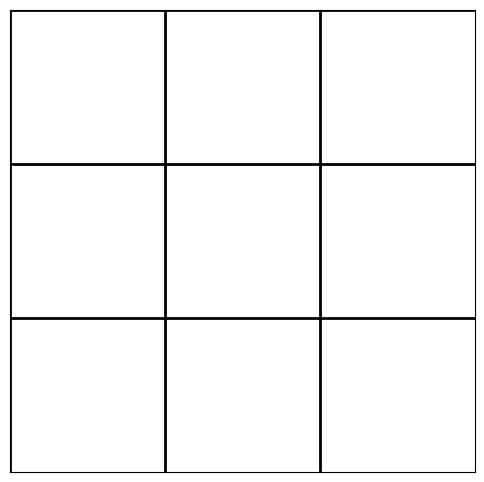

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 0 0 


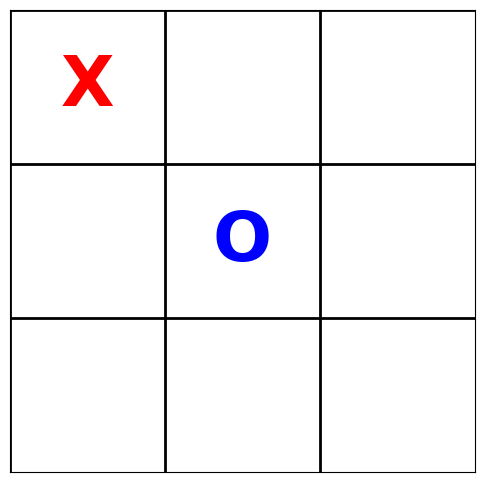

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 2 2


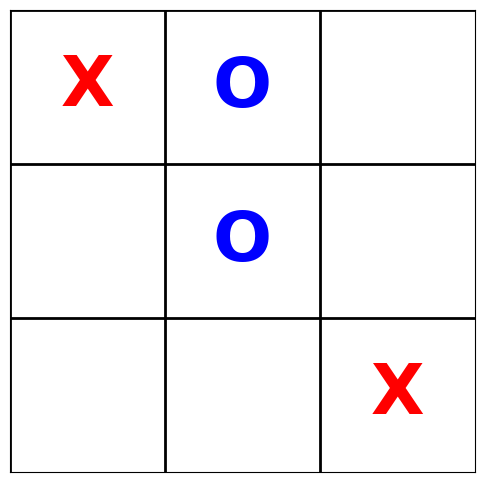

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 2 1


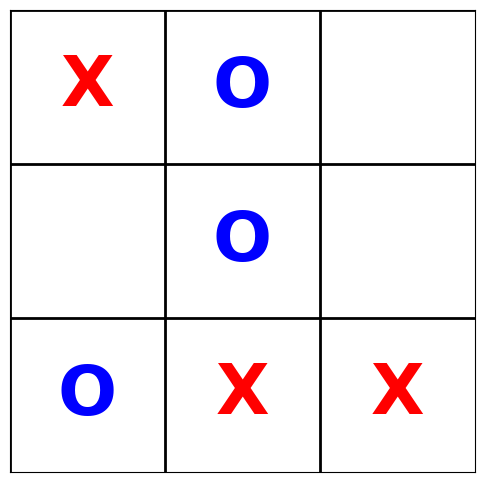

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 0 2


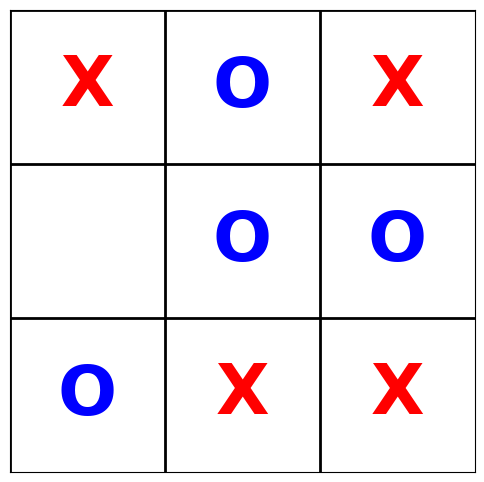

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 1 0


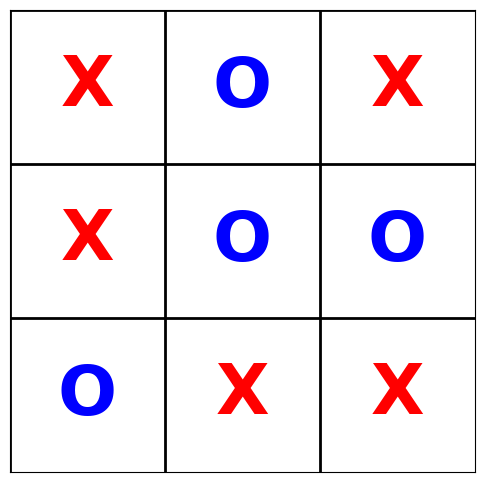

Este o remiză!


In [42]:
# @title Simulare joc

board = [[" ", " ", " "],
         [" ", " ", " "],
         [" ", " ", " "]]

while True:
    print_board(board)  # Afișează tabla de joc

    if check_win(board, "X"):  # Verifică dacă jucătorul X a câștigat
        print("X a câștigat!")
        break
    if check_win(board, "O"):  # Verifică dacă AI-ul (O) a câștigat
        print("O a câștigat!")
        break
    if is_draw(board):  # Verifică dacă jocul s-a terminat la egalitate
        print("Este o remiză!")
        break

    # Rândul jucătorului
    while True:
        try:
            # Solicită mutarea jucătorului (rând și coloană, separate prin spațiu)
            row, col = map(int, input("Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): ").split())
            if 0 <= row < 3 and 0 <= col < 3:  # Verifică dacă mutarea este în limitele tablei
                if make_move(board, row, col, "X"):  # Efectuează mutarea pentru jucătorul X
                    break
                else:
                    print("Acest loc este deja ocupat. Încercați din nou.")
            else:
                print("Intrare invalidă. Introduceți numerele rândului și coloanei între 0 și 2.")
        except ValueError:
            print("Intrare invalidă. Vă rugăm să introduceți două numere întregi separate prin spațiu.")

    # Rândul AI-ului
    ai_move = find_best_move(board)  # AI-ul alege cea mai bună mutare
    if ai_move:
        make_move(board, ai_move[0], ai_move[1], "O")  # AI-ul face mutarea pentru O


## **Partea 3** - X si 0 pentru o tabla 7x7

Așa cum am observat în Partea 1, pentru table de joc foarte mari, spațiul necesar pentru a explora toate posibilitățile jocului până la final crește exponențial. De această dată, schimbăm și regula de câștig: jucătorul trebuie să alinieze 4 simboluri consecutive, fie pe diagonală, fie pe linie, fie pe coloană. Pe o tablă de 7x7, este foarte probabil ca algoritmul nostru Minimax să nu mai poată alege cele mai bune mutări analizând toate finalurile posibile. În acest caz, trebuie să limităm adâncimea căutării, de exemplu la 5, și să folosim o metodă de evaluare pentru pozițiile care nu sunt terminale.



In [58]:
#@title Logica pentru tabla 6x6
def print_board(board):
    fig, ax = plt.subplots(figsize=(6, 6))  # Creăm o figură de 6x6 pentru tabla de joc.

    # Desenăm grila de joc (liniile orizontale și verticale).
    ax.set_xticks(np.arange(0, 6, 1))
    ax.set_yticks(np.arange(0, 6, 1))
    ax.grid(True, color='black', linewidth=2)  # Setăm liniile grilei să fie negre și groase.

    # Ascundem marcajele și etichetele axelor.
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Setăm fundalul să fie alb.
    ax.set_facecolor('white')

    # Afișăm X-urile și O-urile pe tabla de joc.
    for i in range(6):
        for j in range(6):
            if board[i][j] == "X":
                ax.text(j + 0.5, i + 0.5, "X", ha='center', va='center', fontsize=50, color="red", weight='bold')
            elif board[i][j] == "O":
                ax.text(j + 0.5, i + 0.5, "O", ha='center', va='center', fontsize=50, color="blue", weight='bold')

    # Stabilim limitele grilei.
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    plt.gca().invert_yaxis()  # Inversăm axa y pentru a corespunde cu coordonatele matricei.

    # Afișăm tabla de joc.
    plt.show()



def check_win(board, player):
    n = len(board)  # Dimensiunea tablei (în acest caz, 6)
    win_condition = 4  # Numărul de simboluri consecutive necesare pentru a câștiga

    # Verificăm liniile
    for row in range(n):
        for col in range(n - win_condition + 1):
            if all([board[row][col + i] == player for i in range(win_condition)]):
                return True

    # Verificăm coloanele
    for col in range(n):
        for row in range(n - win_condition + 1):
            if all([board[row + i][col] == player for i in range(win_condition)]):
                return True

    # Verificăm diagonalele (din stânga sus spre dreapta jos)
    for row in range(n - win_condition + 1):
        for col in range(n - win_condition + 1):
            if all([board[row + i][col + i] == player for i in range(win_condition)]):
                return True

    # Verificăm diagonalele (din dreapta sus spre stânga jos)
    for row in range(n - win_condition + 1):
        for col in range(win_condition - 1, n):
            if all([board[row + i][col - i] == player for i in range(win_condition)]):
                return True

    return False

def is_draw(board):
    # Verifică dacă toate pozițiile sunt ocupate
    return all([cell != " " for row in board for cell in row])


In [61]:
#@title Implementare Minmax Unrealistic
import math

def bad_minimax(board, depth, is_maximizing):
    if check_win(board, "X"):
        return -10000  # Jucătorul X câștigă, deci scor negativ pentru AI.
    if check_win(board, "O"):
        return 10000  # AI câștigă, deci scor pozitiv.
    if is_draw(board):
        return 0  # Egalitate.
    if depth > 1:
        return 0

    if is_maximizing:
        best_score = -float("inf")
        for row in range(6):
            for col in range(6):
                if board[row][col] == " ":
                    board[row][col] = "O"  # AI face mutarea.
                    score = bad_minimax(board, depth + 1, False)
                    board[row][col] = " "
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float("inf")
        for row in range(6):
            for col in range(6):
                if board[row][col] == " ":
                    board[row][col] = "X"  # Jucătorul face mutarea.
                    score = bad_minimax(board, depth + 1, True)
                    board[row][col] = " "
                    best_score = min(score, best_score)
        return best_score

def find_best_move(board):
    best_move = None
    best_score = -float("inf")
    for row in range(6):
        for col in range(6):
            if board[row][col] == " ":
                board[row][col] = "O"
                score = bad_minimax(board, 0, False)
                board[row][col] = " "
                if score > best_score:
                    best_score = score
                    best_move = (row, col)
    return best_move


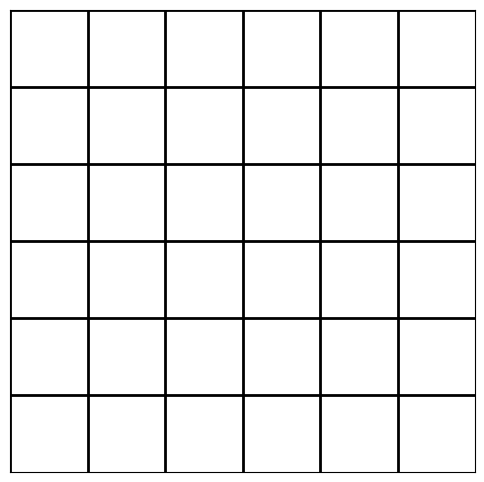

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 3 3


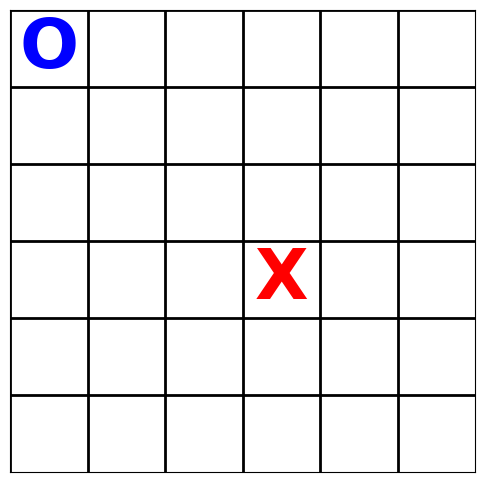

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 2 2


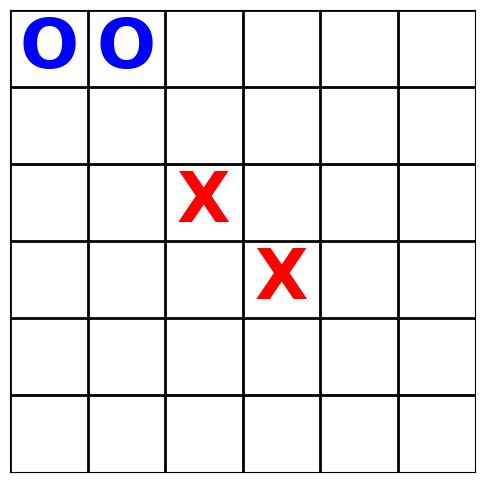

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 0 2


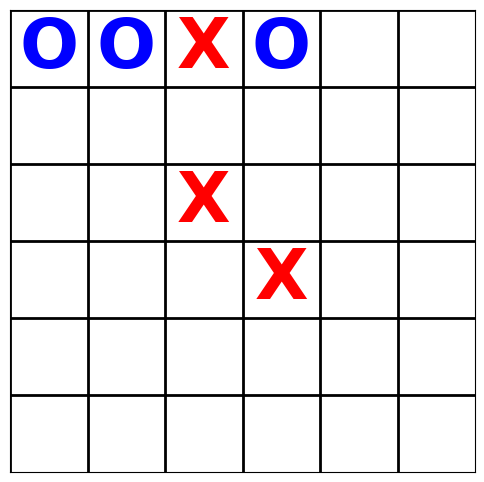

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 1 1


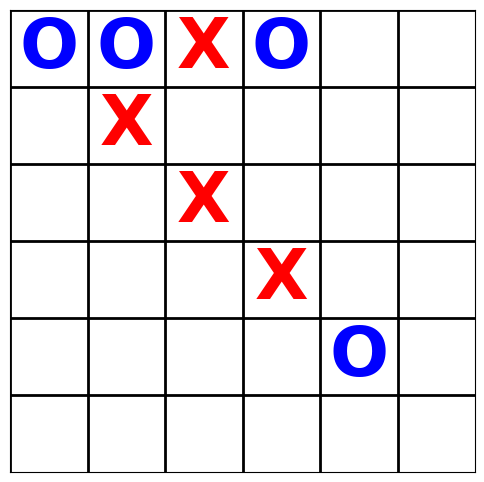

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 1 2


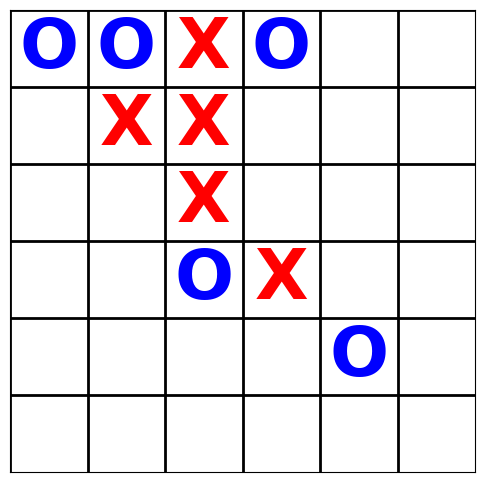

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 1 3


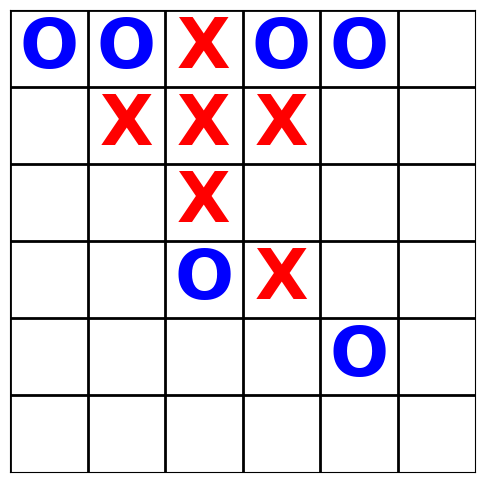

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 0 1
Acest loc este deja ocupat. Încercați din nou.
Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 1 0 


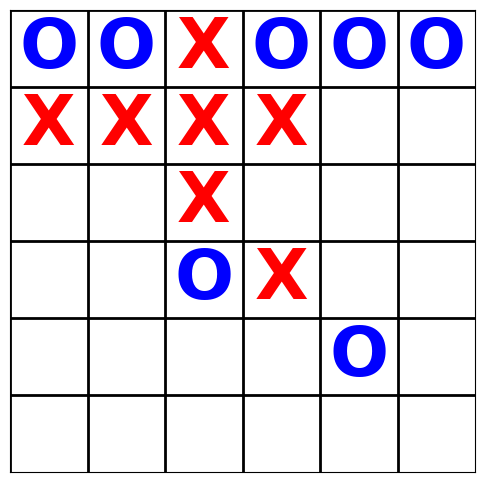

X a câștigat!


In [62]:
board = [[" " for _ in range(6)] for _ in range(6)]


while True:
    print_board(board)  # Afișează tabla de joc

    if check_win(board, "X"):  # Verifică dacă jucătorul X a câștigat
        print("X a câștigat!")
        break
    if check_win(board, "O"):  # Verifică dacă AI-ul (O) a câștigat
        print("O a câștigat!")
        break
    if is_draw(board):  # Verifică dacă jocul s-a terminat la egalitate
        print("Este o remiză!")
        break

    # Rândul jucătorului
    while True:
        try:
            # Solicită mutarea jucătorului (rând și coloană, separate prin spațiu)
            row, col = map(int, input("Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): ").split())
            if 0 <= row < 6 and 0 <= col < 6:  # Verifică dacă mutarea este în limitele tablei
                if make_move(board, row, col, "X"):  # Efectuează mutarea pentru jucătorul X
                    break
                else:
                    print("Acest loc este deja ocupat. Încercați din nou.")
            else:
                print("Intrare invalidă. Introduceți numerele rândului și coloanei între 0 și 2.")
        except ValueError:
            print("Intrare invalidă. Vă rugăm să introduceți două numere întregi separate prin spațiu.")

    # Rândul AI-ului
    ai_move = find_best_move(board)  # AI-ul alege cea mai bună mutare
    if ai_move:
        make_move(board, ai_move[0], ai_move[1], "O")  # AI-ul face mutarea pentru O


Pentru a îmbunătăți algoritmul Minimax și a face o evaluare mai detaliată a tabloului, este important să înlocuiești evaluarea simplă bazată pe adâncimea cu una bazată pe starea efectivă a tabloului. În loc de a returna 0 pentru niveluri de adâncime mai mari, poți folosi o funcție de evaluare care calculează scorul pe baza stării tabloului.

```
def bad_minimax(board, depth, is_maximizing):
    if check_win(board, "X"):
        return -1  # Jucătorul X câștigă, deci scor negativ pentru AI.
    if check_win(board, "O"):
        return 1  # AI câștigă, deci scor pozitiv.
    if is_draw(board):
        return 0  # Egalitate.
    if depth > 2:
        return 0

```

Iată cum poți modifica codul pentru a include o funcție de evaluare, analizeaza_tabla, care oferă scoruri pe baza numărului de simboluri pe linii, coloane și diagonale:

```
def bad_minimax(board, depth, is_maximizing):
    if check_win(board, "X"):
        return -10000  # Jucătorul X câștigă, deci scor negativ pentru AI.
    if check_win(board, "O"):
        return 10000  # AI câștigă, deci scor pozitiv.
    if is_draw(board):
        return 0  # Egalitate.
    if depth > 2:
        return analizeaza_tabla(board, is_maximizing)

def analizeaza_tabla(board, is_maximizing):
    if oponent_board are 3 0-uri pe o line:
        return -100
    if our_board are 3 0-uri pe o line:
        return 100

```

✏️ **Problema 5:** Oferă 3 exemple de funcții `analizeaza_tabla(board, is_maximizing)` pe care le-am putea utiliza pentru a îmbunătăți performanța modelului nostru AI, astfel încât să funcționeze mai bine.


✏️ **Solutia ta aici!**

✏️ **Problema 6:** Codeaza una dintre ideile propuse! Si verifica cat de inteligent este modelul tau!

In [ ]:
#@title Implementare Minmax Bun
import math

def good_minimax(board, depth, is_maximizing):
    if check_win(board, "X"):
        return -math.inf  # Jucătorul X câștigă, deci scor negativ pentru AI.
    if check_win(board, "O"):
        return math.inf  # AI câștigă, deci scor pozitiv.
    if is_draw(board):
        return 0  # Egalitate.
    if depth > 2:
        return analizeaza_tabla(board, is_maximizing)

    if is_maximizing:
        best_score = -float("inf")
        for row in range(7):
            for col in range(7):
                if board[row][col] == " ":
                    board[row][col] = "O"  # AI face mutarea.
                    score = bad_minimax(board, depth + 1, False)
                    board[row][col] = " "
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float("inf")
        for row in range(7):
            for col in range(7):
                if board[row][col] == " ":
                    board[row][col] = "X"  # Jucătorul face mutarea.
                    score = bad_minimax(board, depth + 1, True)
                    board[row][col] = " "
                    best_score = min(score, best_score)
        return best_score

def find_best_move(board):
    best_move = None
    best_score = -float("inf")
    for row in range(7):
        for col in range(7):
            if board[row][col] == " ":
                board[row][col] = "O"
                score = bad_minimax(board, 0, False)
                board[row][col] = " "
                if score > best_score:
                    best_score = score
                    best_move = (row, col)
    return best_move

def analizeaza_tabla(board, is_maximizing):
  ### codul tau aici
  return 0

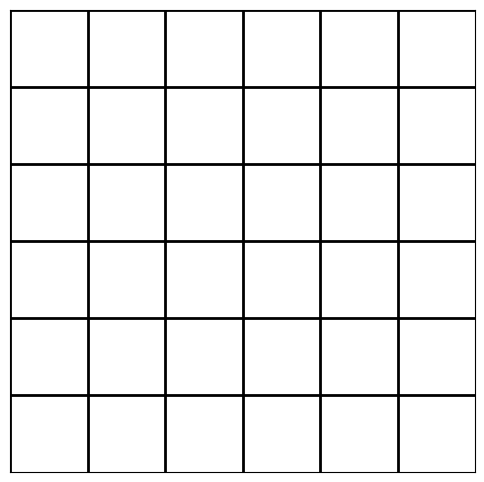

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 3 3


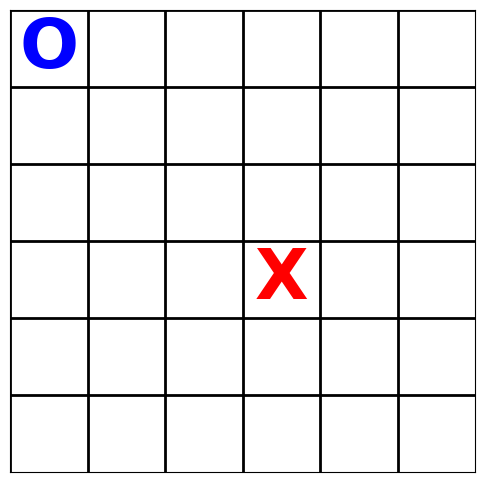

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 2 2


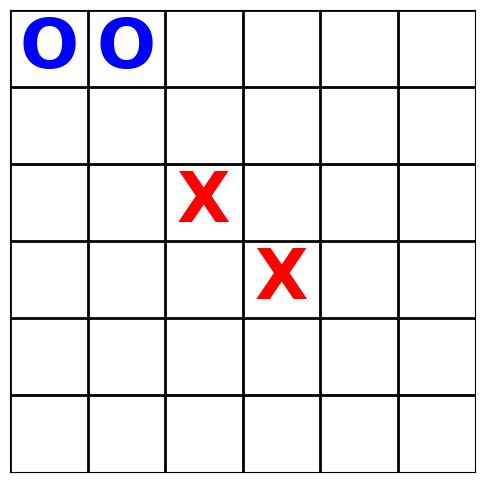

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 5 5


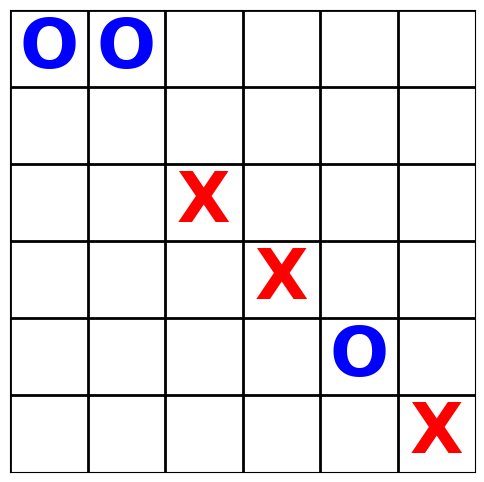

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 0 1
Acest loc este deja ocupat. Încercați din nou.
Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 1 2 


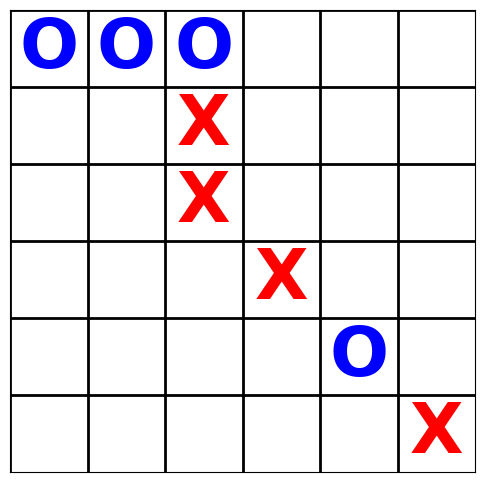

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 0 3


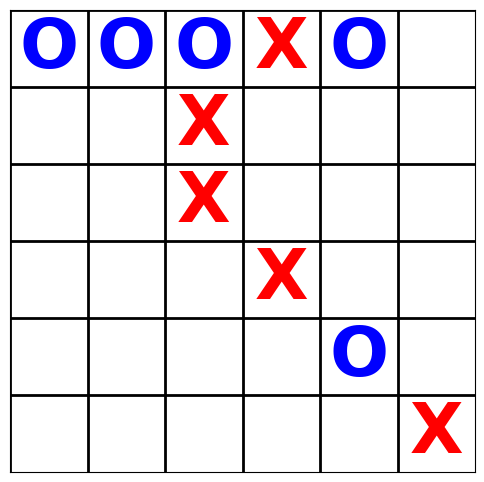

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 4 2


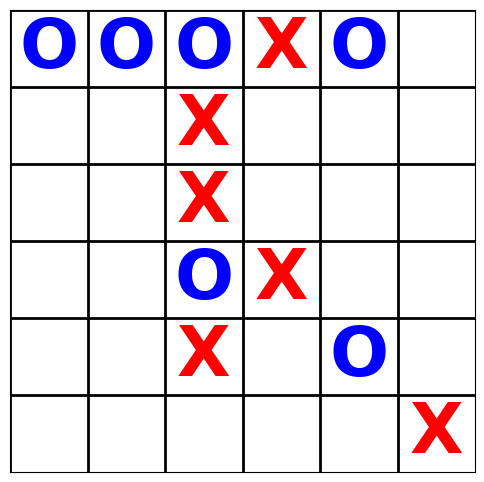

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 2 4 


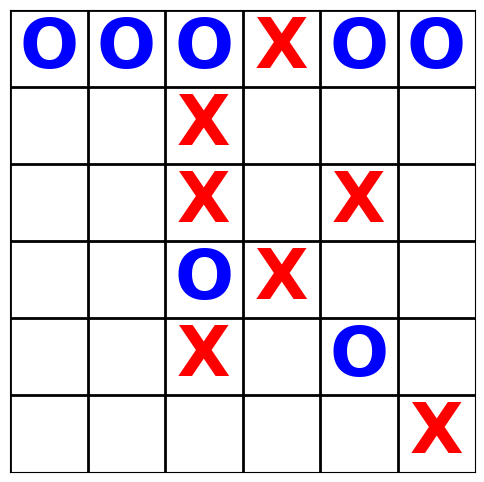

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 1 5


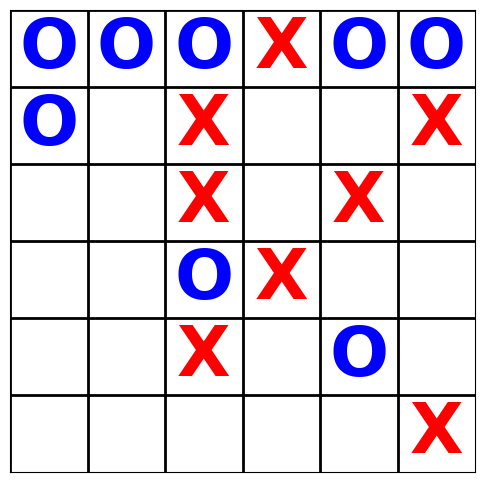

X a câștigat!


In [63]:
board = [[" " for _ in range(7)] for _ in range(7)]


while True:
    print_board(board)  # Afișează tabla de joc

    if check_win(board, "X"):  # Verifică dacă jucătorul X a câștigat
        print("X a câștigat!")
        break
    if check_win(board, "O"):  # Verifică dacă AI-ul (O) a câștigat
        print("O a câștigat!")
        break
    if is_draw(board):  # Verifică dacă jocul s-a terminat la egalitate
        print("Este o remiză!")
        break

    # Rândul jucătorului
    while True:
        try:
            # Solicită mutarea jucătorului (rând și coloană, separate prin spațiu)
            row, col = map(int, input("Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): ").split())
            if 0 <= row < 7 and 0 <= col < 7:  # Verifică dacă mutarea este în limitele tablei
                if make_move(board, row, col, "X"):  # Efectuează mutarea pentru jucătorul X
                    break
                else:
                    print("Acest loc este deja ocupat. Încercați din nou.")
            else:
                print("Intrare invalidă. Introduceți numerele rândului și coloanei între 0 și 2.")
        except ValueError:
            print("Intrare invalidă. Vă rugăm să introduceți două numere întregi separate prin spațiu.")

    # Rândul AI-ului
    ai_move = find_best_move(board)  # AI-ul alege cea mai bună mutare
    if ai_move:
        make_move(board, ai_move[0], ai_move[1], "O")  # AI-ul face mutarea pentru O